In [68]:
import pandas as pd
import sqlite3
import os

import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [69]:
# Open SQL Database and initialize dataframe
path = "../Algorithm/data"
conn = sqlite3.connect("C:\\Users\\charl\\Desktop\\Algorithm\\data\\Prediction.db")
df = pd.read_sql_query("SELECT * FROM BLAZERS", conn)

In [70]:
# Add remaining teams to the end of the dataframe
teams = ["BLAZERS", "BUCKS", "BULLS", "CAVALIERS", "CELTICS", "CLIPPERS", "GRIZZLIES", "HAWKS", "HEAT", "HORNETS", "JAZZ", "KINGS", "KNICKS", "LAKERS", "MAGIC", "MAVERICKS", "NETS", "NUGGETS", "PACERS", "PELICANS", "PISTONS", "RAPTORS", "ROCKETS", "SIXERS", "SPURS", "SUNS", "THUNDER", "TIMBERWOLVES", "WARRIORS", "WIZARDS"]

for team in teams[1:]:
    temp_df = pd.read_sql_query("SELECT * FROM " + team, conn)
    df = pd.concat([df, temp_df], axis=0)

In [71]:
df

,game_ID,game_date,TO_1,three_m1,three_a1,ts_1,diff_1,TO_2,three_m2,three_a2,...,TO_3,three_m3,three_a3,ts_3,diff_3,ts_final,home_ppg,home_oppg,away_ppg,away_oppg
0,21801230,2019-04-10,2,7,13,69,9,7,20,33,...,14,28,52,211,15,267.0,114.7,110.5,114.2,115.3
1,21801206,2019-04-07,6,5,15,54,4,14,11,32,...,21,18,47,167,5,223.0,114.7,110.5,110.7,106.7
2,21801175,2019-04-03,9,9,18,58,2,13,12,28,...,22,15,45,155,17,205.0,114.7,110.5,103.5,106.1
3,21801106,2019-03-25,4,8,18,58,4,6,15,35,...,11,22,56,185,5,292.0,114.7,110.5,112.2,112.3
4,21801093,2019-03-23,4,9,16,60,4,10,15,31,...,14,20,44,181,3,229.0,114.7,110.5,107.0,107.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,21600122,2016-11-11,8,5,10,57,5,13,9,22,...,22,14,36,159,9,199.0,109.2,107.4,110.3,107.2
119,21600107,2016-11-09,5,6,15,42,26,13,9,28,...,19,14,40,158,20,211.0,109.2,107.4,108.0,105.4
120,21600094,2016-11-07,10,7,18,53,7,16,11,31,...,22,21,48,167,1,220.0,109.2,107.4,115.3,109.6
121,21600070,2016-11-04,9,2,13,38,0,19,4,22,...,32,6,31,134,8,187.0,109.2,107.4,103.2,104.0


In [72]:
#df.to_csv("../data/2016-2018_save.csv")

In [5]:
df.head()

,game_ID,game_date,TO_1,three_m1,three_a1,ts_1,diff_1,TO_2,three_m2,three_a2,...,TO_3,three_m3,three_a3,ts_3,diff_3,ts_final,home_ppg,home_oppg,away_ppg,away_oppg
0,21801230,2019-04-10,2,7,13,69,9,7,20,33,...,14,28,52,211,15,267.0,114.7,110.5,114.2,115.3
1,21801206,2019-04-07,6,5,15,54,4,14,11,32,...,21,18,47,167,5,223.0,114.7,110.5,110.7,106.7
2,21801175,2019-04-03,9,9,18,58,2,13,12,28,...,22,15,45,155,17,205.0,114.7,110.5,103.5,106.1
3,21801106,2019-03-25,4,8,18,58,4,6,15,35,...,11,22,56,185,5,292.0,114.7,110.5,112.2,112.3
4,21801093,2019-03-23,4,9,16,60,4,10,15,31,...,14,20,44,181,3,229.0,114.7,110.5,107.0,107.3


In [7]:
df['avg_points_scored'] = (df['home_ppg'] + df['away_ppg'])/2
df['avg_points_allowed'] = (df['home_oppg'] + df['away_oppg'])/2
df["TO_2"] = df["TO_2"] + df["TO_1"]
df['TO_3'] = df["TO_3"] + df["TO_2"]
df["three_a2"] = df["three_a2"] + df["three_a1"]
df['three_a3'] = df["three_a3"] + df["three_a2"]
df["three_m2"] = df["three_m2"] + df["three_m1"]
df['three_m3'] = df["three_m3"] + df["three_m2"]


In [8]:
df.head()

,game_ID,game_date,TO_1,three_m1,three_a1,ts_1,diff_1,TO_2,three_m2,three_a2,...,three_a3,ts_3,diff_3,ts_final,home_ppg,home_oppg,away_ppg,away_oppg,avg_points_scored,avg_points_allowed
0,21801230,2019-04-10,2,7,13,69,9,9,27,46,...,98,211,15,267.0,114.7,110.5,114.2,115.3,114.45,112.9
1,21801206,2019-04-07,6,5,15,54,4,20,16,47,...,94,167,5,223.0,114.7,110.5,110.7,106.7,112.70,108.6
2,21801175,2019-04-03,9,9,18,58,2,22,21,46,...,91,155,17,205.0,114.7,110.5,103.5,106.1,109.10,108.3
3,21801106,2019-03-25,4,8,18,58,4,10,23,53,...,109,185,5,292.0,114.7,110.5,112.2,112.3,113.45,111.4
4,21801093,2019-03-23,4,9,16,60,4,14,24,47,...,91,181,3,229.0,114.7,110.5,107.0,107.3,110.85,108.9


In [50]:
# delete unusable variables
# Score diff helpful for 3q, not for 1st
df = df[['ts_1','ts_final', 'home_ppg', 'home_oppg', 'away_ppg', 'away_oppg']]

In [51]:
#df['percent_3pt'] = df['three_m1']/df['three_a1']

In [52]:
df.sample(20)

,ts_1,ts_final,home_ppg,home_oppg,away_ppg,away_oppg
84,67,229.0,103.2,102.1,111.7,111.2
29,59,222.0,115.1,114.3,114.4,108.4
111,66,238.0,108.7,104.4,104.3,106.4
41,55,219.0,106.6,110.3,102.9,110.0
94,49,195.0,103.2,104.0,97.9,100.8
70,63,215.0,110.0,108.5,108.1,109.6
45,42,191.0,104.1,99.8,104.0,100.4
27,57,246.0,115.1,114.3,108.9,110.1
31,33,196.0,105.7,105.9,112.2,112.3
21,44,215.0,107.0,107.3,111.7,106.5


,ts_1,ts_final,home_ppg,home_oppg,away_ppg,away_oppg
ts_1,1.000000,0.558535,0.223433,0.193519,0.226611,0.229801
ts_final,0.558535,1.000000,0.350506,0.325175,0.322202,0.333109
home_ppg,0.223433,0.350506,1.000000,0.515948,0.258941,0.293673
home_oppg,0.193519,0.325175,0.515948,1.000000,0.294114,0.288390
away_ppg,0.226611,0.322202,0.258941,0.294114,1.000000,0.516568
away_oppg,0.229801,0.333109,0.293673,0.288390,0.516568,1.000000


<AxesSubplot:>

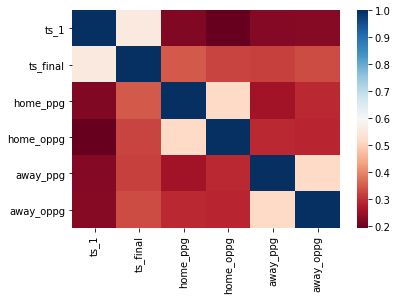

In [53]:
# check for multicolinearity
corr = df.corr()
display(corr)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [54]:
# Given all of our variables have low correlation values (well under 5), we can confirm they are okay to be included
desc = df.describe()
desc

,ts_1,ts_final,home_ppg,home_oppg,away_ppg,away_oppg
count,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000
mean,54.152887,215.395066,107.708485,107.706831,107.710762,107.708458
std,8.660689,20.616166,4.663117,4.433115,4.663796,4.436304
min,20.000000,144.000000,97.900000,96.800000,97.900000,96.800000
25%,48.000000,201.000000,104.000000,104.700000,104.000000,104.700000
50%,54.000000,215.000000,107.000000,107.400000,107.300000,107.400000
75%,60.000000,229.000000,111.700000,110.400000,111.700000,110.400000
max,89.000000,301.000000,118.100000,119.400000,118.100000,119.400000


In [55]:
#df = df[df['diff_1'] < 29]
df = df[df['ts_final'] > 100]
df = df[df['ts_final'] < 310]


In [56]:
#build the model
X = df.drop('ts_final', axis = 1)
Y = df["ts_final"]

#Split data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Fit the model
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [57]:
# Print out results of the model
intercept = regression_model.intercept_
coefficent = regression_model.coef_[0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

for coef in zip(X.columns, regression_model.coef_):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -65.99
----------------------------------------------------------------------------------------------------
The Coefficient for ts_1 is 1.1
The Coefficient for home_ppg is 0.61
The Coefficient for home_oppg is 0.48
The Coefficient for away_ppg is 0.41
The Coefficient for away_oppg is 0.55


In [58]:
Y_predict = regression_model.predict(X_test)

In [59]:
Y_predict

array([221.78606975, 213.4164661 , 227.97271556, 230.76258596,
       194.61610996, 190.28636377, 214.11797345, 197.31037291,
       218.83041962, 208.03200816, 206.42241792, 228.53383215,
       214.19693926, 206.87271339, 206.07380999, 225.9421716 ,
       211.97590537, 202.58116936, 206.11272405, 206.16059894,
       178.93190824, 193.6245754 , 215.3074739 , 225.86125862,
       248.72472635, 212.11032724, 207.98210797, 238.68934887,
       209.12198592, 205.97639935, 231.35124744, 229.89260719,
       226.78625357, 225.79502477, 222.75512442, 237.46037759,
       220.581978  , 204.49275522, 221.81022411, 246.45220836,
       211.04617633, 218.2786837 , 210.23301255, 216.10427387,
       220.65377521, 224.37829057, 210.15990347, 218.86712318,
       213.71196486, 237.75630558, 224.7767827 , 200.62862348,
       227.21262517, 209.96311406, 205.49527352, 214.27798416,
       202.46880742, 198.85062383, 218.29898305, 203.02818008,
       211.40030218, 216.85448428, 192.20982453, 216.83

In [60]:
print('Train Score :', regression_model.score(X_train,Y_train))
print('Test Score:', regression_model.score(X_test,Y_test))

Train Score : 0.411036167392947
Test Score: 0.3856307069615371


In [61]:
# Applying model to be used with the statsmodel package (needs a constant) 
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)


# fit the data
est = model.fit()
est.pvalues
# TO, ts, all pgg

const         1.507837e-12
ts_1         2.284441e-227
home_ppg      4.303014e-19
home_oppg     2.593690e-12
away_ppg      2.917732e-10
away_oppg     2.839248e-12
dtype: float64

In [62]:
#White's test for heteroscedasticity
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

0.40060758833748517 0.4011219782039119
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 0.4006
We fail to reject the null hypthoesis, so there is no heterosecdasticity. 

0.35543798374768154 0.35572215923208217
----------------------------------------------------------------------------------------------------


In [63]:
model = sm.OLS(Y, X2)
est = model.fit()

_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)

0.40060758833748517 0.4011219782039119


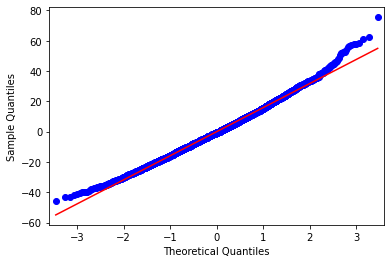

The mean of the residuals is 5.215e-13


In [65]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [66]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 2.41e+02
MAE 12.3
RMSE 15.5


In [67]:
model_r2 = r2_score(Y_test, Y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.39


In [49]:
est.conf_int()

,0,1
const,-78.217417,-44.275933
TO_1,0.010345,0.415028
ts_1,1.048382,1.175654
home_ppg,0.462265,0.725726
home_oppg,0.354529,0.631350
away_ppg,0.286874,0.549839
away_oppg,0.351669,0.629566


In [41]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               ts_final   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     2679.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:16:51   Log-Likelihood:                -13871.
No. Observations:                3688   AIC:                         2.775e+04
Df Residuals:                    3683   BIC:                         2.778e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.7105      5

In [42]:
import pickle

# pickle the model
with open('../Models/predict_3.sav','wb') as f:
     pickle.dump(regression_model, f)